In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Load dataset
data = pd.read_excel(r"C:\Users\Parminder.Grewal\Downloads\merged_scored_dataset1.xlsx")

# Convert the target variable based on the given conditions
data['flag'] = 3
data.loc[data['Laboratory confirmed, since the beginning of the pandemic Hospitalized'] <= 449, 'flag'] = 2
data.loc[data['Laboratory confirmed, since the beginning of the pandemic Hospitalized'] <= 290, 'flag'] = 1



In [3]:
# Drop the columns that exist in the dataset and ignore any errors for columns not found
columns_to_drop = ['District', 'Recovery Rate', 'Cluster','Hospitalization Rate']
data = data.drop(columns=[col for col in columns_to_drop if col in data.columns])

# Split the data into training and test sets
X = data.drop(columns=['Laboratory confirmed, since the beginning of the pandemic Hospitalized', 'flag'])
y = data['flag']

train_data_flag, test_data_flag, y_train_flag, y_test_flag = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
mean_flag = train_data_flag.mean(axis=0)
std_flag = train_data_flag.std(axis=0)
train_data_flag = (train_data_flag - mean_flag) / std_flag
test_data_flag = (test_data_flag - mean_flag) / std_flag

train_data_flag.head(), y_train_flag.head()  # Displaying the preprocessed training data for review


(       Laboratory confirmed, since the beginning of the pandemic TOTAL  \
 12097                                           1.737141                 
 14341                                           1.077518                 
 83                                             -0.915731                 
 11552                                          -0.619892                 
 16063                                           1.618142                 
 
        Laboratory confirmed, since the beginning of the pandemic Difference from  \
 12097                                           0.412834                           
 14341                                          -0.354939                           
 83                                             -0.697016                           
 11552                                           0.085960                           
 16063                                          -0.522177                           
 
        Laboratory confirmed, since 

In [ ]:
#!pip install tensorflow



In [4]:
from tensorflow import keras
from tensorflow.keras import layers

# Model Building
model_flag = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(train_data_flag.shape[1],)),
    layers.Dropout(0.2), #to prevent overfitting
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='softmax')  # We have 3 classes (1, 2, 3), but due to indexing, it's better to set this to 4 and ignore the 0th index
])

model_flag.compile(optimizer='adam', 
                   loss='sparse_categorical_crossentropy', 
                   metrics=['accuracy'])

#model training
history_flag = model_flag.fit(train_data_flag, y_train_flag, epochs=100, batch_size=32, validation_split=0.2)


# Display training history for review
history_flag.history


Epoch 1/100
334/334 [==============================] - 1s 2ms/step - loss: 0.5548 - accuracy: 0.7548 - val_loss: 0.4120 - val_accuracy: 0.8192
Epoch 2/100
334/334 [==============================] - 0s 1ms/step - loss: 0.3956 - accuracy: 0.8195 - val_loss: 0.3639 - val_accuracy: 0.8368
Epoch 3/100
334/334 [==============================] - 0s 1ms/step - loss: 0.3606 - accuracy: 0.8325 - val_loss: 0.3385 - val_accuracy: 0.8454
Epoch 4/100
334/334 [==============================] - 0s 1ms/step - loss: 0.3317 - accuracy: 0.8491 - val_loss: 0.3040 - val_accuracy: 0.8630
Epoch 5/100
334/334 [==============================] - 0s 1ms/step - loss: 0.3136 - accuracy: 0.8579 - val_loss: 0.2886 - val_accuracy: 0.8795
Epoch 6/100
334/334 [==============================] - 0s 1ms/step - loss: 0.2916 - accuracy: 0.8704 - val_loss: 0.2584 - val_accuracy: 0.8840
Epoch 7/100
334/334 [==============================] - 0s 1ms/step - loss: 0.2708 - accuracy: 0.8822 - val_loss: 0.2459 - val_accuracy: 0.8903

{'loss': [0.5548414587974548,
  0.3956180512905121,
  0.36059316992759705,
  0.33174389600753784,
  0.31357207894325256,
  0.2915812134742737,
  0.2707509398460388,
  0.2568085789680481,
  0.23470422625541687,
  0.22154957056045532,
  0.20555077493190765,
  0.19708208739757538,
  0.18274451792240143,
  0.17823359370231628,
  0.16965965926647186,
  0.1633872240781784,
  0.1570766121149063,
  0.1528807431459427,
  0.14457949995994568,
  0.13857145607471466,
  0.134832963347435,
  0.12442108243703842,
  0.12552465498447418,
  0.11829545348882675,
  0.1169905886054039,
  0.11261198669672012,
  0.1074666827917099,
  0.11103281378746033,
  0.10382129997015,
  0.10435526072978973,
  0.09907735139131546,
  0.09980902075767517,
  0.09665947407484055,
  0.09674447029829025,
  0.09590911865234375,
  0.09107927232980728,
  0.08907224237918854,
  0.09060121327638626,
  0.08597545325756073,
  0.0859607607126236,
  0.08750477433204651,
  0.07913228124380112,
  0.07739754766225815,
  0.083405777812004

In [5]:
# Evaluate the model on the test set
loss, accuracy = model_flag.evaluate(test_data_flag, y_test_flag)

print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


105/105 [==============================] - 0s 913us/step - loss: 0.0423 - accuracy: 0.9862
Test Loss: 0.04226138815283775
Test Accuracy: 0.9862275719642639


In [6]:
# Computing Other Metrics (Precision, Recall, F1-score)
from sklearn.metrics import classification_report

# Predict the classes
y_pred = model_flag.predict(test_data_flag)
y_pred_classes = tf.argmax(y_pred, axis=1)

print(classification_report(y_test_flag, y_pred_classes))



105/105 [==============================] - 0s 788us/step
              precision    recall  f1-score   support

           1       0.99      0.98      0.98       821
           2       0.96      0.98      0.97       852
           3       1.00      0.99      0.99      1667

    accuracy                           0.99      3340
   macro avg       0.98      0.98      0.98      3340
weighted avg       0.99      0.99      0.99      3340



105/105 [==============================] - 0s 740us/step


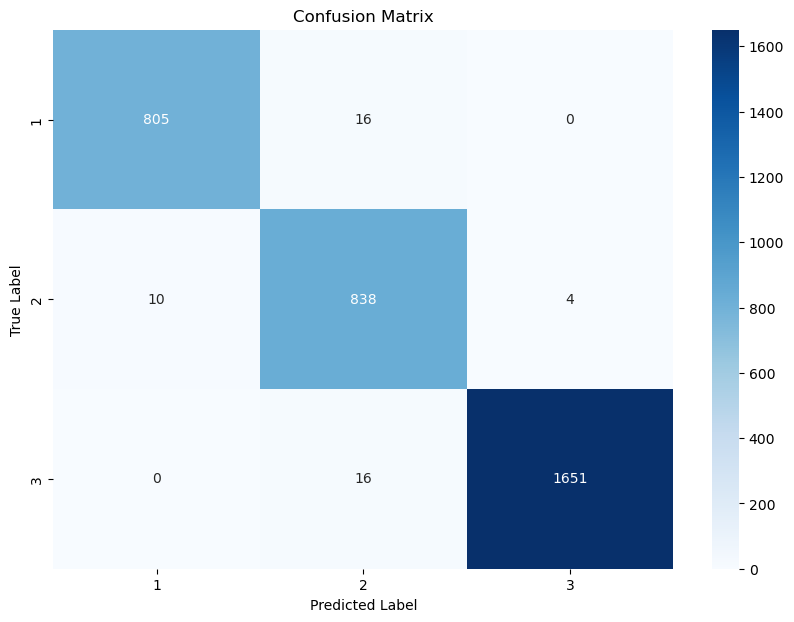

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict the classes
y_pred = model_flag.predict(test_data_flag)
y_pred_classes = tf.argmax(y_pred, axis=1).numpy()

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test_flag, y_pred_classes, labels=[1, 2, 3])

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


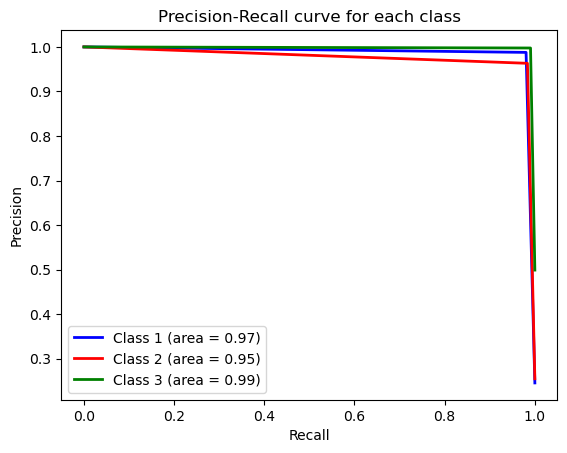

In [8]:
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize

# Binarize the labels
y_test_bin = label_binarize(y_test_flag, classes=[1, 2, 3])
y_pred_bin = label_binarize(y_pred_classes, classes=[1, 2, 3])

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(3):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_pred_bin[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_pred_bin[:, i])

# Plot
colors = ['blue', 'red', 'green']
for i, color in zip(range(3), colors):
    plt.plot(recall[i], precision[i], color=color, lw=2,
             label='Class {0} (area = {1:0.2f})'.format(i+1, average_precision[i]))
    
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve for each class')
plt.legend(loc="best")
plt.show()


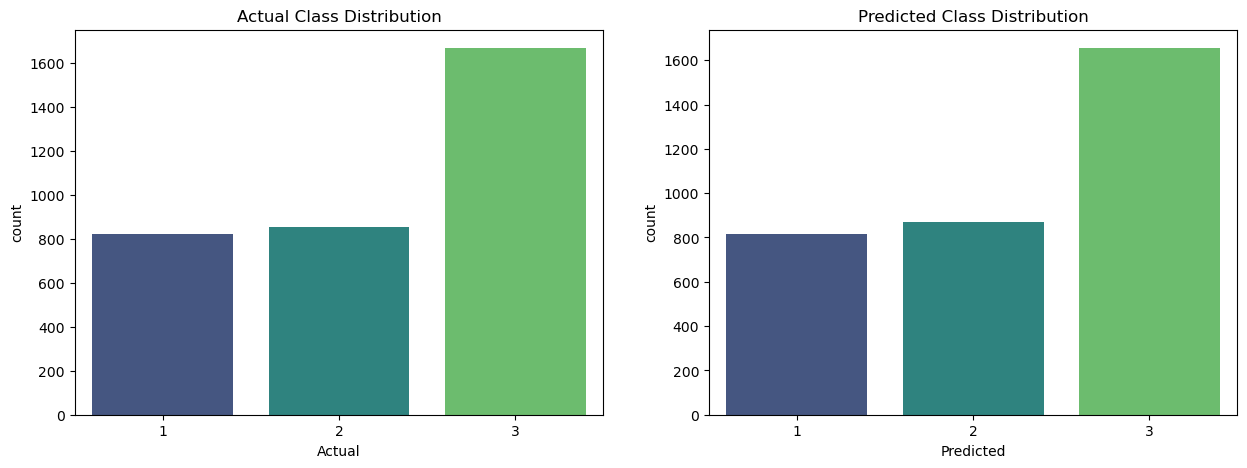

In [9]:
# Create a DataFrame for visualization
df_visual = pd.DataFrame({
    'Actual': y_test_flag,
    'Predicted': y_pred_classes
})

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

sns.countplot(x='Actual', data=df_visual, ax=axes[0], palette='viridis')
axes[0].set_title('Actual Class Distribution')

sns.countplot(x='Predicted', data=df_visual, ax=axes[1], palette='viridis')
axes[1].set_title('Predicted Class Distribution')

plt.show()


In [12]:
#!pip install adversarial-robustness-toolbox

  Using cached adversarial_robustness_toolbox-1.15.2-py3-none-any.whl (1.5 MB)


In [17]:
from art.estimators.classification import TensorFlowV2Classifier
from art.attacks.evasion import ShadowAttack

# As we have a TensorFlow model
classifier = TensorFlowV2Classifier(
    model=model_flag,  # trained model
    nb_classes=3,  # Number of output classes
    input_shape=(train_data_flag.shape[1],),  # Input shape
    clip_values=(0, 1)  # Assuming pixel values between 0 and 1, adjust if different
)

# Create the Shadow Attack instance
#attack = ShadowAttack(estimator=classifier)
# Generate adversarial examples for each sample in the test data
x_test_adv = []

for sample in test_data_flag.values:
    adversarial_sample = attack.generate(x=sample.reshape(1, -1))
    x_test_adv.append(adversarial_sample)

x_test_adv = np.vstack(x_test_adv)  # Convert the list of adversarial samples to a numpy array

# Evaluate the model on the adversarial examples
loss, accuracy = model_flag.evaluate(x_test_adv, y_test_flag)
print(f"Accuracy on adversarial samples: {accuracy:.4f}")


# Generate adversarial examples
#x_test_adv = attack.generate(x=test_data_flag)




ValueError: Unrecognized input dimension. Shadow Attack can only be applied to image data.

In [ ]:
#!pip uninstall scikit-learn adversarial-robustness-toolbox
#!pip install scikit-learn adversarial-robustness-toolbox


In [12]:
#import art
#art.__version__


'1.15.2'

In [13]:
#help(ShadowAttack)


Help on class ShadowAttack in module art.attacks.evasion.shadow_attack:

class ShadowAttack(art.attacks.attack.EvasionAttack)
 |  ShadowAttack(estimator: Union[art.estimators.classification.tensorflow.TensorFlowV2Classifier, art.estimators.certification.randomized_smoothing.tensorflow.TensorFlowV2RandomizedSmoothing, art.estimators.classification.pytorch.PyTorchClassifier, art.estimators.certification.randomized_smoothing.pytorch.PyTorchRandomizedSmoothing], sigma: float = 0.5, nb_steps: int = 300, learning_rate: float = 0.1, lambda_tv: float = 0.3, lambda_c: float = 1.0, lambda_s: float = 0.5, batch_size: int = 400, targeted: bool = False, verbose: bool = True)
 |  
 |  Implementation of the Shadow Attack.
 |  
 |  | Paper link: https://arxiv.org/abs/2003.08937
 |  
 |  Method resolution order:
 |      ShadowAttack
 |      art.attacks.attack.EvasionAttack
 |      art.attacks.attack.Attack
 |      abc.ABC
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, es

In [19]:
from art.attacks.evasion import FastGradientMethod

# define the classifier using ART
classifier = TensorFlowV2Classifier(
    model=model_flag,
    nb_classes=3,
    input_shape=(train_data_flag.shape[1],),
    clip_values=(0, 1),
    loss_object=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
)


# Create the FGM attack instance
attack = FastGradientMethod(estimator=classifier)

# Generate adversarial examples using FGM
x_test_adv = attack.generate(x=test_data_flag.values)

# Evaluate the model on the adversarial examples
loss, accuracy = model_flag.evaluate(x_test_adv, y_test_flag)
print(f"Accuracy on adversarial samples: {accuracy:.4f}")

C:\Users\Parminder.Grewal\AppData\Local\anaconda3\lib\site-packages\keras\src\backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


105/105 [==============================] - 0s 904us/step - loss: 2.7995 - accuracy: 0.6033
Accuracy on adversarial samples: 0.6033


In [21]:

# Compute the difference between the original and adversarial samples
perturbations = x_test_adv - test_data_flag.values

# Calculate the average perturbation for each feature
average_perturbations = np.mean(np.abs(perturbations), axis=0)

# Create a DataFrame to better visualize the results
perturbation_df = pd.DataFrame({
    'Feature': test_data_flag.columns,
    'Average Perturbation': average_perturbations
})

perturbation_df.sort_values(by='Average Perturbation', ascending=False, inplace=True)

# The result perturbation_df shows the average absolute perturbation introduced by the FGM for each feature in the dataset.


In [22]:
perturbation_df

,Feature,Average Perturbation
7,"Reported, the last 7 days,Incidence per 100, I...",0.276125
8,"Reported, the last 7 days,Incidence per 100, I...",0.268490
5,"Reported, the last 7 days,Incidence per 100, I...",0.268029
3,"Laboratory confirmed, since the beginning of t...",0.266032
0,"Laboratory confirmed, since the beginning of t...",0.264836
6,"Reported, the last 7 days,Incidence per 100, I...",0.263895
1,"Laboratory confirmed, since the beginning of t...",0.260550
4,"Laboratory confirmed, since the beginning of t...",0.259949
9,Score,0.257829
2,"Laboratory confirmed, since the beginning of t...",0.251238


In [23]:
#  adversarial training


from art.attacks.evasion import FastGradientMethod

# As before, define the classifier using ART
classifier = TensorFlowV2Classifier(
    model=model_flag,  # initial trained model
    nb_classes=3,
    input_shape=(train_data_flag.shape[1],),
    clip_values=(0, 1),
    loss_object=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
)

# Create the FGM attack instance for generating adversarial examples
attack = FastGradientMethod(estimator=classifier)

# Generate adversarial examples from the training data
x_train_adv = attack.generate(x=train_data_flag.values)

# Combine the original and adversarial training data
x_train_combined = np.vstack([train_data_flag.values, x_train_adv])
y_train_combined = np.hstack([y_train_flag, y_train_flag])  # Duplicate the labels for adversarial examples

# Retrain the model using the combined dataset
history_adversarial = model_flag.fit(x_train_combined, y_train_combined, epochs=100, batch_size=32)

# Evaluate the adversarially trained model on the original test set
loss, accuracy = model_flag.evaluate(test_data_flag, y_test_flag)
print(f"Accuracy after adversarial training: {accuracy:.4f}")

#Accuracy after adversarial training: 0.9880


C:\Users\Parminder.Grewal\AppData\Local\anaconda3\lib\site-packages\keras\src\backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Epoch 1/100
835/835 [==============================] - 1s 1ms/step - loss: 0.4103 - accuracy: 0.8597
Epoch 2/100
835/835 [==============================] - 1s 1ms/step - loss: 0.2563 - accuracy: 0.8954
Epoch 3/100
835/835 [==============================] - 1s 1ms/step - loss: 0.2301 - accuracy: 0.9068
Epoch 4/100
835/835 [==============================] - 1s 1ms/step - loss: 0.2155 - accuracy: 0.9145
Epoch 5/100
835/835 [==============================] - 1s 1ms/step - loss: 0.2077 - accuracy: 0.9177
Epoch 6/100
835/835 [==============================] - 1s 1ms/step - loss: 0.2003 - accuracy: 0.9210
Epoch 7/100
835/835 [==============================] - 1s 2ms/step - loss: 0.1904 - accuracy: 0.9247
Epoch 8/100
835/835 [==============================] - 1s 1ms/step - loss: 0.1846 - accuracy: 0.9282
Epoch 9/100
835/835 [==============================] - 1s 1ms/step - loss: 0.1792 - accuracy: 0.9299
Epoch 10/100
835/835 [==============================] - 1s 1ms/step - loss: 0.1735 - accura

In [24]:
# Evaluating the adversarially trained model on adversarial test examples

# Generate adversarial test examples using FGM
x_test_adv = attack.generate(x=test_data_flag.values)

# Evaluate the adversarially trained model on the adversarial test examples
loss_adv, accuracy_adv = model_flag.evaluate(x_test_adv, y_test_flag)
print(f"Accuracy on adversarial test samples after adversarial training: {accuracy_adv:.4f}")


C:\Users\Parminder.Grewal\AppData\Local\anaconda3\lib\site-packages\keras\src\backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


105/105 [==============================] - 0s 981us/step - loss: 0.3435 - accuracy: 0.8910
Accuracy on adversarial test samples after adversarial training: 0.8910


In [ ]:
"""
Original model accuracy on clean test data: 98.80%
Original model accuracy on FGM adversarial test data: 60.33%
Adversarially trained model accuracy on clean test data: 98.80%
Adversarially trained model accuracy on FGM adversarial test data: 89.10%
The adversarially trained model performs remarkably better against adversarial inputs while retaining a high accuracy on clean test data.
"""

In [25]:
# Applying the Basic Iterative Method (BIM)

from art.attacks.evasion import BasicIterativeMethod

# defining the classifier using ART
classifier = TensorFlowV2Classifier(
    model=model_flag,  # adversarially trained model
    nb_classes=3,
    input_shape=(train_data_flag.shape[1],),
    clip_values=(0, 1),
    loss_object=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
)

# Create the BIM attack instance
attack_bim = BasicIterativeMethod(estimator=classifier)

# Generate adversarial examples using BIM
x_test_adv_bim = attack_bim.generate(x=test_data_flag.values)

# Evaluate the adversarially trained model on the BIM adversarial test examples
loss_bim, accuracy_bim = model_flag.evaluate(x_test_adv_bim, y_test_flag)
print(f"Accuracy on BIM adversarial test samples after adversarial training: {accuracy_bim:.4f}")




PGD - Batches: 0it [00:00, ?it/s]

105/105 [==============================] - 0s 952us/step - loss: 0.9416 - accuracy: 0.7584
Accuracy on BIM adversarial test samples after adversarial training: 0.7584


In [27]:
# 1. Generate Adversarial Training Data using BIM

# Generate BIM adversarial examples from the training data
x_train_adv_bim = attack_bim.generate(x=train_data_flag.values)

# Combine the original and BIM adversarial training data
x_train_combined_bim = np.vstack([train_data_flag.values, x_train_adv_bim])
y_train_combined_bim = np.hstack([y_train_flag, y_train_flag])  # Duplicate the labels for BIM adversarial examples

# Retrain the model using the combined BIM dataset
model_bim_trained = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(train_data_flag.shape[1],)),
    layers.Dropout(0.2), 
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='softmax')
])

model_bim_trained.compile(optimizer='adam', 
                          loss='sparse_categorical_crossentropy', 
                          metrics=['accuracy'])

history_bim_adversarial = model_bim_trained.fit(x_train_combined_bim, y_train_combined_bim, epochs=100, batch_size=32)

# 2. Evaluate the BIM-Adversarially Trained Model

# On clean test data
loss_clean, accuracy_clean = model_bim_trained.evaluate(test_data_flag, y_test_flag)
print(f"Accuracy on clean test samples after BIM adversarial training: {accuracy_clean:.4f}")

# On FGM adversarial test data (using previously generated x_test_adv)
loss_fgm, accuracy_fgm = model_bim_trained.evaluate(x_test_adv, y_test_flag)
print(f"Accuracy on FGM adversarial test samples after BIM adversarial training: {accuracy_fgm:.4f}")

# On BIM adversarial test data (generate new ones or use previously generated x_test_adv_bim)
loss_bim, accuracy_bim = model_bim_trained.evaluate(x_test_adv_bim, y_test_flag)
print(f"Accuracy on BIM adversarial test samples after BIM adversarial training: {accuracy_bim:.4f}")

#copied the output
###Accuracy on clean test samples after BIM adversarial training: 0.9644
#105/105 [==============================] - 0s 1ms/step - loss: 0.4503 - accuracy: 0.8769
#Accuracy on FGM adversarial test samples after BIM adversarial training: 0.8769
#105/105 [==============================] - 0s 1ms/step - loss: 0.1038 - accuracy: 0.9653
#Accuracy on BIM adversarial test samples after BIM adversarial training: 0.9653


PGD - Batches: 0it [00:00, ?it/s]

Epoch 1/100
835/835 [==============================] - 1s 1ms/step - loss: 0.4980 - accuracy: 0.7770
Epoch 2/100
835/835 [==============================] - 1s 1ms/step - loss: 0.3794 - accuracy: 0.8271
Epoch 3/100
835/835 [==============================] - 1s 1ms/step - loss: 0.3386 - accuracy: 0.8511
Epoch 4/100
835/835 [==============================] - 1s 2ms/step - loss: 0.3076 - accuracy: 0.8686
Epoch 5/100
835/835 [==============================] - 2s 2ms/step - loss: 0.2821 - accuracy: 0.8818
Epoch 6/100
835/835 [==============================] - 2s 2ms/step - loss: 0.2659 - accuracy: 0.8903
Epoch 7/100
835/835 [==============================] - 1s 2ms/step - loss: 0.2497 - accuracy: 0.8979
Epoch 8/100
835/835 [==============================] - 1s 1ms/step - loss: 0.2390 - accuracy: 0.9028
Epoch 9/100
835/835 [==============================] - 1s 2ms/step - loss: 0.2290 - accuracy: 0.9068
Epoch 10/100
835/835 [==============================] - 1s 2ms/step - loss: 0.2205 - accura